# Marketing Analytics | Bass Model



## Lilit Asminian

# Amazon Echo Hub

The Command Center feature for Amazon is designed to enhance your smart home experience by allowing you to manage and control various connected devices more efficiently. With the help of this feature, your Amazon Echo device may be used as a central hub to manage a variety of smart home appliances, such cameras, thermostats, lights, and more.
You can design unique routines and automation sequences using Command Centre that are customised to your own requirements. Saying "Alexa, good morning" can turn on the lights, change the thermostat, and play the music you like as part of a routine you would have named "Good Morning."

# Apple HomePod

The Apple HomePod is an innovation in the smart speaker market thanks to several features and design decisions. For starters, its concentration on sound quality distinguishes it, with innovative audio technologies such as spatial awareness and adaptive sound, which modify the music output based on the room's acoustics. This emphasis on providing higher quality audio results in an immersive and pleasant listening experience that appeals to both audiophiles and casual listeners.

Second, Apple's establishment of Siri into the HomePod provides effortless voice control features, allowing users to not only play music but also do a variety of hands-free tasks, such as setting reminders and timers or controlling smart home devices. Its excellent integration with Apple's ecosystem adds to its appeal, allowing for effortless use with other Apple devices such as iPhones, iPads, and Macs.

I found Apple HomePod data in Statstica. I used their sales to make predictions

In [25]:
import pandas as pd
data = pd.read_excel("statistic_apple-homepod.xlsx",sheet_name=1, names=["NaN", "year", "sales"]) [4:9]

In [47]:
data
data.drop(['NaN'], axis=1)

,year,sales
4,2018,4.2
5,2019,5.9
6,2020,9.8
7,2021,14.8
8,2022,13.6


In [29]:
data['year'] = data['year'].astype(int)

In [30]:
data.dtypes

NaN      float64
year       int64
sales    float64
dtype: object

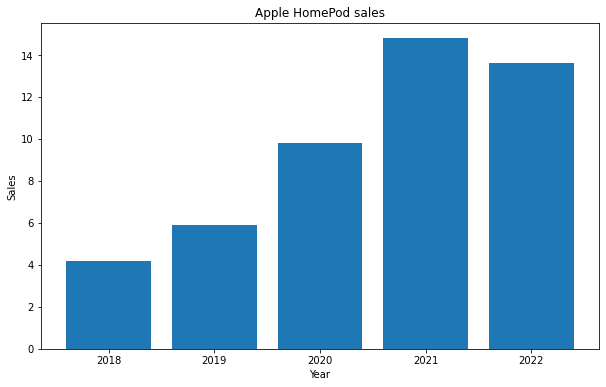

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(data['year'], data['sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Apple HomePod sales')
plt.show()

Functions for f(t) and F(t).

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def bass_f(t, p, q):
    return ((p+q)**2 / p) * np.exp(-(p+q) * t) / (1 + (q / p) * np.exp(-(p+q) * t))**2

def bass_F(t, p, q):
    return (1 - np.exp(-(p+q) * t)) / (1 + (q / p) * np.exp(-(p+q) * t))
def bass_combined(t, p, q):
    return (bass_F(t, p, q), bass_f(t, p, q))


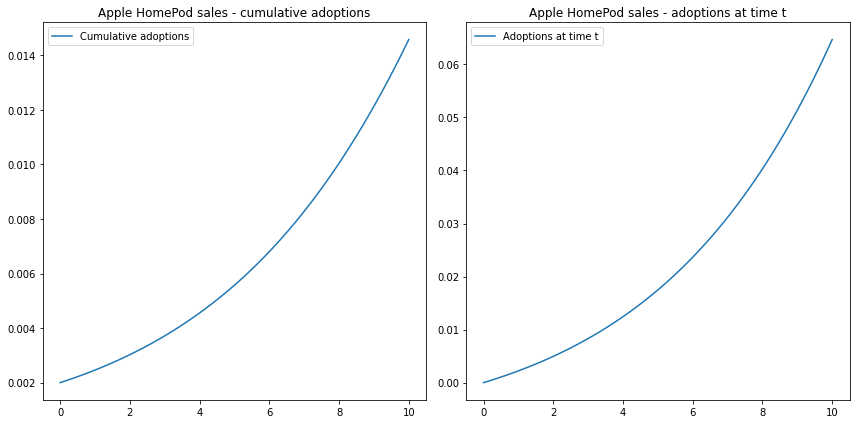

In [84]:
t_values = np.linspace(0, 10, 100)
p_value = 0.002
q_value = 0.21 

f_values, F_values = bass_combined(t_values, p_value, q_value)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, F_values, label='Cumulative adoptions')
plt.title('Apple HomePod sales - cumulative adoptions')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_values, f_values, label='Adoptions at time t')
plt.title('Apple HomePod sales - adoptions at time t')
plt.legend()

plt.tight_layout()
plt.show()

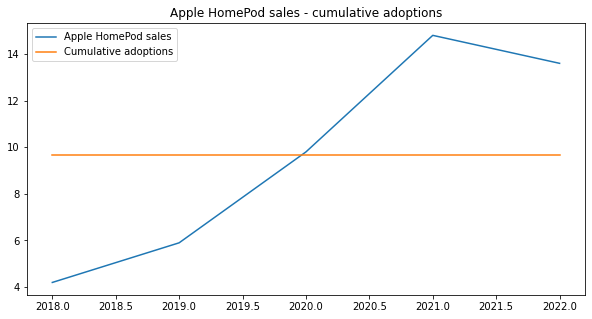

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


plt.figure(figsize=(10, 5))
plt.plot(data['year'], data['sales'], label='Apple HomePod sales')

try:
    p_opt, _ = curve_fit(bass_f, data['year'], data['sales'], p0=[0.1, 0.1, 1000], bounds=([0, 0, 0], [1, 1, np.inf]))
    plt.plot(data['year'], bass_f(data['year'], *p_opt), label='Cumulative adoptions')
except RuntimeError:
    print("Optimization failed. Please check initial guesses and data.")

plt.title('Apple HomePod sales - cumulative adoptions')
plt.legend()
plt.show()



In [86]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

def bass_model(t, p, q, m):
    return m * (1 - np.exp(-(p+q)*t)) / (1 + q/p * np.exp(-(p+q)*t))

sales_data = data['sales'].values
t = np.arange(len(sales_data))

popt, pcov = curve_fit(bass_model, t, sales_data)

p, q, m = popt

print("Estimated parameters:")
print("p:", p)
print("q:", q)
print("m:", m)


Estimated parameters:
p: 87.60702153084252
q: -169.47891511124644
m: 21.328145156917365


In [43]:
import numpy as np
from scipy.optimize import curve_fit

sales = data['sales']

t = np.arange(len(sales)) + 1 

def bass_model(t, m, p, q):
    return m * (((p + q) ** 2 / p) * np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t)) ** 2

popt, pcov = curve_fit(bass_model, t, sales, p0=[sum(sales), 0.02, 0.4])

m, p, q = popt


print("m:", m)
print("p:", p)
print("q:", q)

m: 71.0045923017255
p: 0.0220536844836858
q: 0.7737884883979261


In [74]:
print("Estimated cumulative number of adopters at time t = 3:")
bass_model(3, 0.0220536844836858, 0.7737884883979261, 71.0045923017255)


Estimated cumulative number of adopters at time t = 3:


15.269558930226824

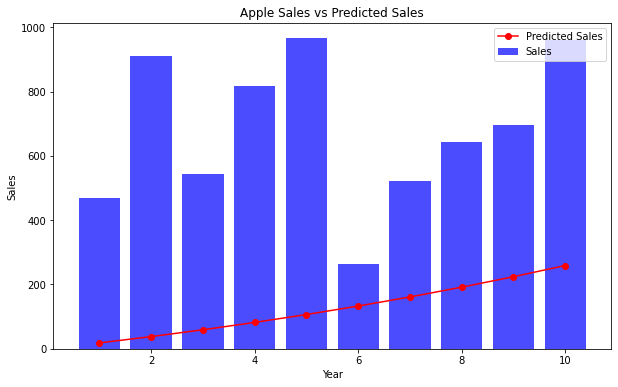

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

apple = pd.DataFrame({'year': range(1, 11), 'sales': np.random.randint(100, 1000, 10)})

def bass_f(t, p, q):
    return (1 - np.exp(-(p+q)*t)) / (1 + q/p * np.exp(-(p+q)*t))

apple['pred_sales'] = bass_f(np.arange(1, 11), p=3.825e-03, q=7.929e-02) * 4.602e+03

plt.figure(figsize=(10, 6))
plt.bar(apple['year'], apple['sales'], label='Sales', color='blue', alpha=0.7)
plt.plot(apple['year'], apple['pred_sales'], marker='o', color='red', label='Predicted Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Apple Sales vs Predicted Sales')
plt.legend()
plt.show()



In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def bass_f(t, p, q):
    return (1 - np.exp(-(p+q)*t)) / (1 + q/p * np.exp(-(p+q)*t))


years = np.arange(2009, 2059)


innovation_prediction = bass_f(np.arange(1, 51), p=3.825e-03, q=7.929e-02) * 4.602e+03

innovation_data = pd.DataFrame({'Year': years, 'Sales': innovation_prediction})

print(innovation_data.head()) 


   Year       Sales
0  2009   18.281950
1  2010   37.984364
2  2011   59.203183
3  2012   82.038405
4  2013  106.593818


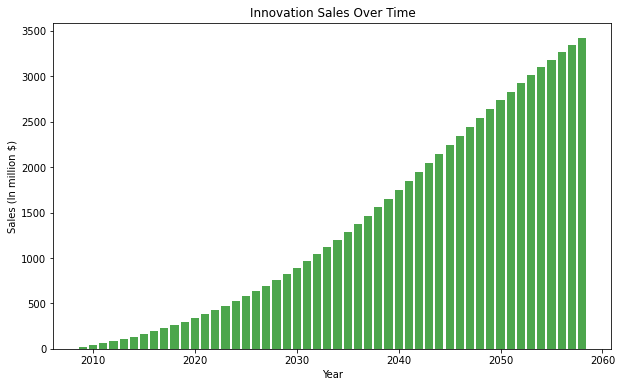

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(innovation_data['Year'], innovation_data['Sales'], color='green', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Sales (In million $)')
plt.title('Innovation Sales Over Time')
plt.show()


Refrences:
https://www.statista.com/statistics/1421706/apple-homepod-unit-sales/